In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

airbnb = pd.read_csv("listings.csv")
airbnb_response_time = airbnb.dropna(subset=["host_response_time"])
airbnb

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20230319180919,2023-03-19,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,...,4.96,4.88,4.92,NaN,f,1,1,0,0,0.26
1,5506,https://www.airbnb.com/rooms/5506,20230319180919,2023-03-19,city scrape,** Fort Hill Inn Private! Minutes to center!**,"Private guest room with private bath, You do n...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/miso/Hosting-...,8229,...,4.88,4.53,4.74,Approved by the government,f,10,10,0,0,0.69
2,6695,https://www.airbnb.com/rooms/6695,20230319180919,2023-03-19,city scrape,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex","Comfortable, Fully Equipped private apartment...","Peaceful, Architecturally interesting, histori...",https://a0.muscache.com/pictures/38ac4797-e7a4...,8229,...,4.96,4.50,4.72,STR446650,f,10,10,0,0,0.74
3,8789,https://www.airbnb.com/rooms/8789,20230319180919,2023-03-20,city scrape,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,Beacon Hill is a historic neighborhood filled ...,https://a0.muscache.com/pictures/miso/Hosting-...,26988,...,4.96,4.96,4.56,NaN,f,7,7,0,0,0.24
4,4765070,https://www.airbnb.com/rooms/4765070,20230319180919,2023-03-19,city scrape,Studio w/ private entrance and bathroom,Private Studio located in Boston (town of Jama...,"Jamaica Plain (JP) is an open, artsy, hip neig...",https://a0.muscache.com/pictures/miso/Hosting-...,24584716,...,4.85,4.48,4.69,str-416042,t,1,1,0,0,3.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,1956275,https://www.airbnb.com/rooms/1956275,20230319180919,2023-03-20,previous scrape,"Beautiful 3 bd- 1.5 bath with parking, in Boston.","Beautiful & spacious 3 Bedrooms, 1.5 baths wit...","The neighborhood is Jamaica Plain, great for w...",https://a0.muscache.com/pictures/42671192/d68d...,9622924,...,4.70,4.42,4.41,NaN,f,1,1,0,0,0.94
3860,2000797,https://www.airbnb.com/rooms/2000797,20230319180919,2023-03-19,city scrape,"Private balcony&kitchenette, 15min to ctr,safe st","Charming Victorian hill-top house, pleasant sa...","Jones Hill is a quiet, safe residential neighb...",https://a0.muscache.com/pictures/41815068/942b...,9898255,...,4.86,4.59,4.67,STR-443035,f,5,2,3,0,1.67
3861,2014651,https://www.airbnb.com/rooms/2014651,20230319180919,2023-03-19,city scrape,One Private Bedroom in J.P.,Private bedroom on third floor of three family...,From the Boston Globe;<br /><br />JAMAICA PLAI...,https://a0.muscache.com/pictures/27672761/5e98...,2155838,...,4.86,4.56,4.36,NaN,f,1,0,1,0,0.34
3862,2014882,https://www.airbnb.com/rooms/2014882,20230319180919,2023-03-19,city scrape,1 bedroom and private bathroom,A country feel in Brighton center. Upstairs tw...,This is a quiet suburban neighborhood which is...,https://a0.muscache.com/pictures/394bce4a-68fa...,1521296,...,4.80,4.72,4.71,STR-415415,t,2,0,2,0,2.63


In [66]:
response_time_vs_communication_rating = airbnb_response_time.groupby(["host_response_time"]).mean(numeric_only=True)["review_scores_communication"]
response_time_vs_overall_rating = airbnb_response_time.groupby(["host_response_time"]).mean(numeric_only=True)["review_scores_rating"]


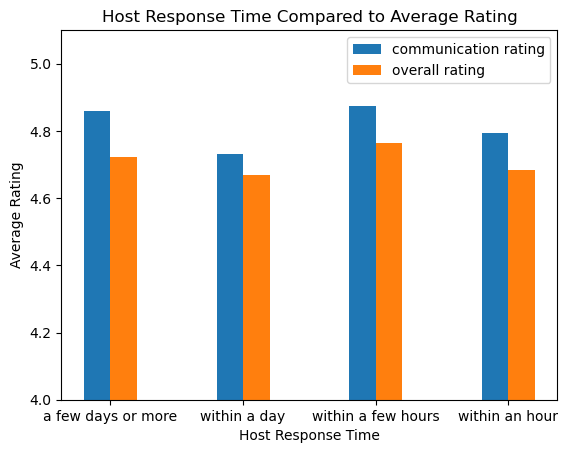

In [67]:
X_axis = np.arange(4)
plt.bar(X_axis - 0.1, response_time_vs_communication_rating, 0.2, label = "communication rating")
plt.bar(X_axis + 0.1, response_time_vs_overall_rating, 0.2, label = "overall rating")
plt.legend()
plt.ylim(4,5.1)
plt.xticks(X_axis, response_time_vs_overall_rating.index)
plt.xlabel("Host Response Time")
plt.ylabel("Average Rating")
plt.title("Host Response Time Compared to Average Rating")
plt.show()

In [71]:
location_vs_location_rating = airbnb.groupby(["neighbourhood_cleansed"]).mean(numeric_only=True)["review_scores_location"]
location_vs_overall_rating = airbnb.groupby(["neighbourhood_cleansed"]).mean(numeric_only=True)["review_scores_rating"]


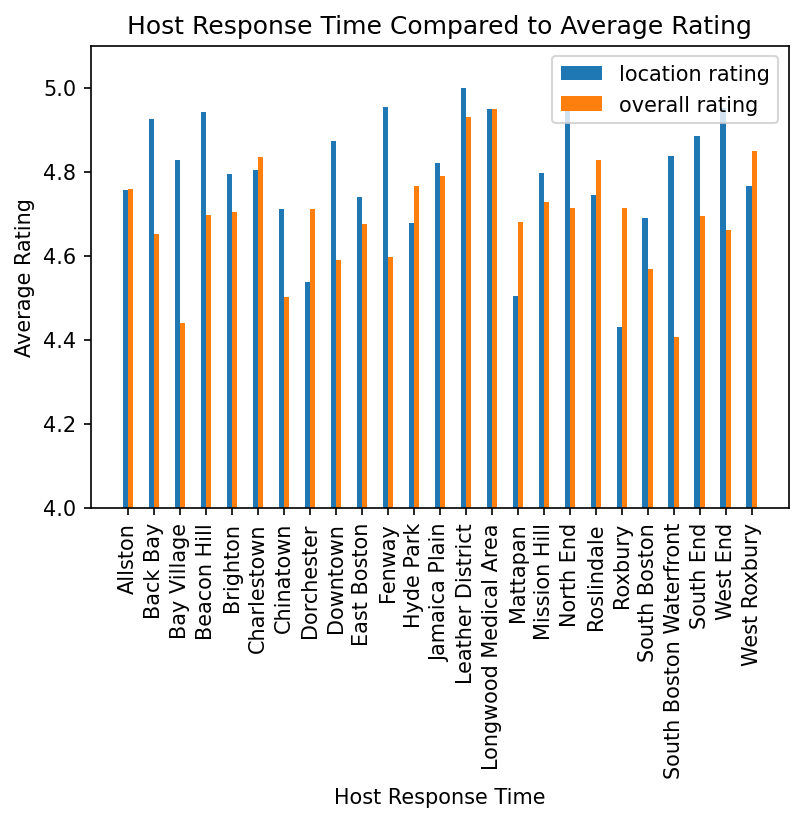

In [95]:
# bad
plt.figure(figsize=(6, 4), dpi=150)
X_axis = np.arange(25)
plt.bar(X_axis - 0.1, location_vs_location_rating, 0.2, label = "location rating")
plt.bar(X_axis + 0.1, location_vs_overall_rating, 0.2, label = "overall rating")
plt.legend()
plt.ylim(4,5.1)
plt.xticks(X_axis, location_vs_overall_rating.index)
plt.xticks(rotation = 90)
plt.xlabel("Host Response Time")
plt.ylabel("Average Rating")
plt.title("Host Response Time Compared to Average Rating")
plt.show()

Text(0.5, 0, 'Location Rating of Airbnb')

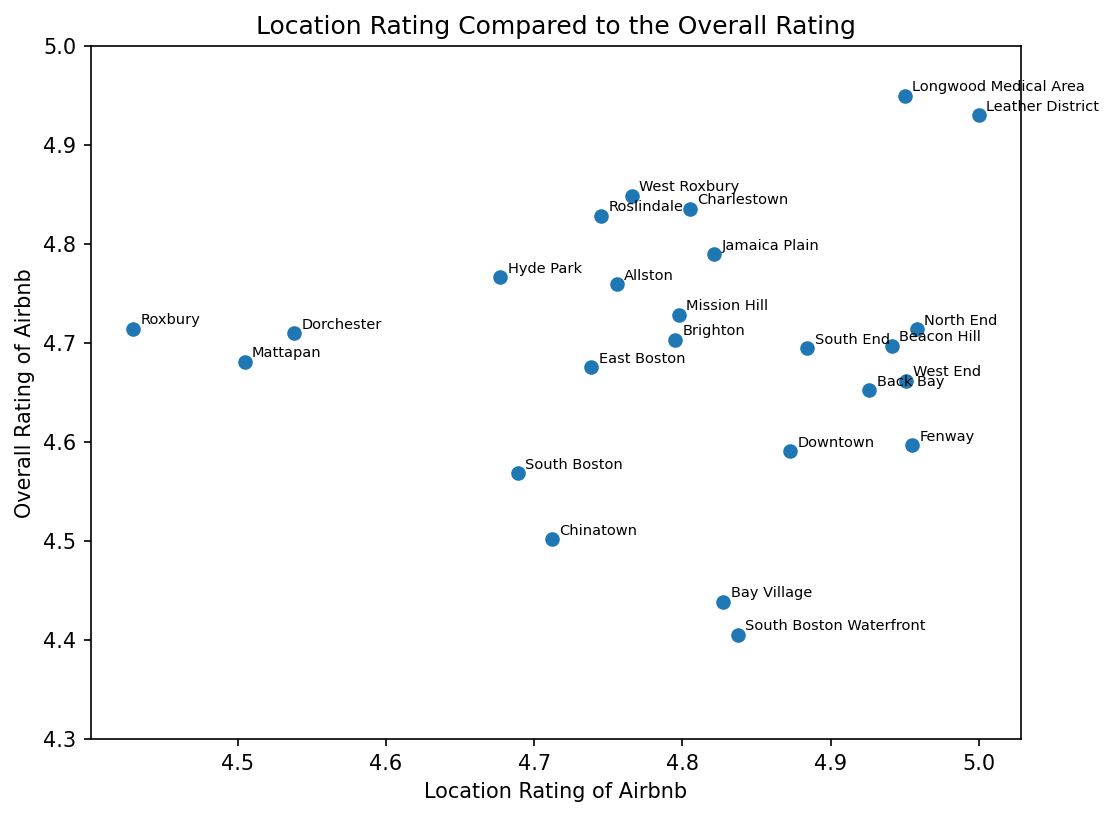

In [100]:
plt.figure(figsize=(8, 6), dpi=150)
plt.scatter(location_vs_location_rating, location_vs_overall_rating)
for i, v in location_vs_location_rating.items():
    x =  location_vs_location_rating[i] + 0.005
    y =  location_vs_overall_rating[i] + 0.005
    plt.text(x, y, i, fontsize=7)
plt.ylim(4.3, 5)
plt.title("Location Rating Compared to the Overall Rating")
plt.ylabel("Overall Rating of Airbnb")
plt.xlabel("Location Rating of Airbnb")

In [108]:
room_vs_cleanliness_rating = airbnb.groupby(["room_type"]).mean(numeric_only=True)["review_scores_cleanliness"]
room_vs_overall_rating = airbnb.groupby(["room_type"]).mean(numeric_only=True)["review_scores_rating"]

room_vs_cleanliness_rating

room_type
Entire home/apt    4.754876
Hotel room         4.793529
Private room       4.656093
Shared room        4.536154
Name: review_scores_cleanliness, dtype: float64

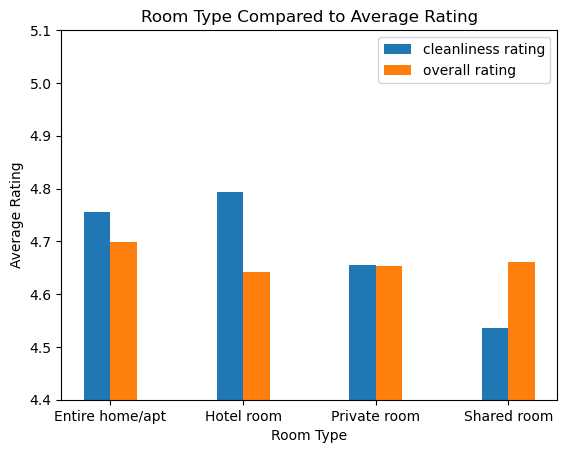

In [112]:
X_axis = np.arange(4)
plt.bar(X_axis - 0.1, room_vs_cleanliness_rating, 0.2, label = "cleanliness rating")
plt.bar(X_axis + 0.1, room_vs_overall_rating, 0.2, label = "overall rating")
plt.legend()
plt.ylim(4.4,5.1)
plt.xticks(X_axis, room_vs_cleanliness_rating.index)
plt.xlabel("Room Type")
plt.ylabel("Average Rating")
plt.title("Room Type Compared to Average Rating")
plt.show()

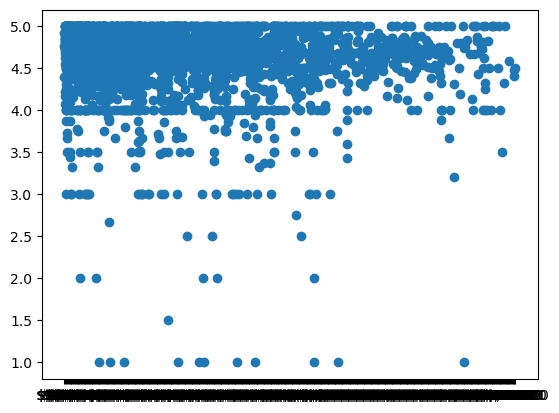

In [115]:
# bad
# airbnb price vs value rating
plt.scatter(airbnb.price, airbnb.review_scores_value)

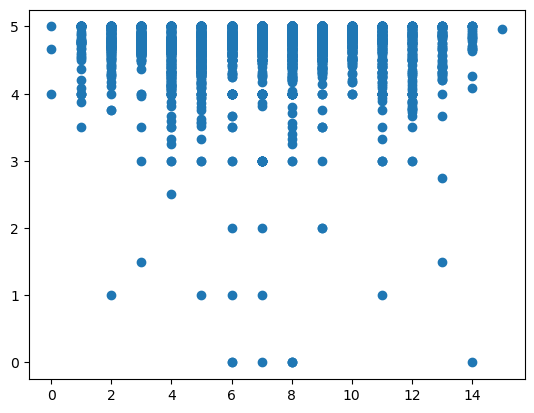

In [141]:
# years of experience vs overall rating
# bad
for _ in range(len(airbnb.host_since.axes[0])):
    airbnb["years_of_experience"] = 2023
airbnb.years_of_experience = airbnb.years_of_experience - airbnb.host_since.str[:4].astype("int32")
plt.scatter(airbnb.years_of_experience, airbnb.review_scores_rating)

<BarContainer object of 3864 artists>

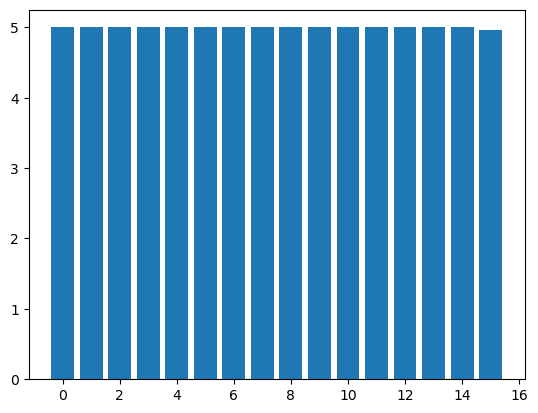

In [142]:
# bad
# years of experience as host vs. overall rating
years_vs_rating = airbnb.groupby(["years_of_experience"]).mean(numeric_only=True)["review_scores_rating"]
plt.bar(airbnb.years_of_experience, airbnb.review_scores_rating)